# Figure Comparing the Electric Field Drop off in 1D, 2D, and 3D PIC Simulations

In [1]:
#Import Libraries
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
c =299792458

Electron position (array([9.99931466]),)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


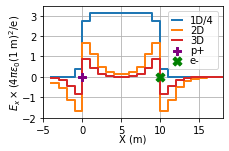

In [2]:
center = 2 #Center index of 2D/3D simulations
FigTime = 10 # Output file index to save figure


fig = plt.figure()
for dim in np.array(['1D','2D','3D']):
    file ='EField/'+ dim+'/%04.f.sdf'%FigTime
    data = sh.getdata(file,verbose=False) #Load simulation data


    #Read in electric field and scale 1D results
    label=dim #Plot label
    if dim=='1D':
        scale = 4
        Ex =data.Electric_Field_Ex.data/scale
        # Get particle positions
        proton_pos = data.Particles_Px_proton.grid.data
        ele_position = data.Particles_Px_electron.grid.data
        label= dim + '/' + str(scale)        
    if dim=='2D':  
        Ex =data.Electric_Field_Ex.data[:,center]
    if dim=='3D':  
        Ex =data.Electric_Field_Ex.data[:,center,center]

    x = data.Grid_Grid_mid.data[0]
    
    lw=2 #plot linewidth
    #Constants For Scaling Results
    eps_0 = 8.85418782e-12
    e =1.602176634e-19
    #Graph Results
    if dim=='3D':
        plt.step(x,Ex*4*np.pi*eps_0/e,label=label,where='post',color='C3',linewidth=lw)
    else:
        plt.step(x,Ex*4*np.pi*eps_0/e,label=label,where='post',linewidth=lw)


plt.xlabel('X (m)', labelpad=-1)
plt.ylabel(r'$E_x\times(4 \pi \varepsilon_0(\rm{1~m})^2/e)$', labelpad=-1)
plt.grid()

plt.scatter(proton_pos,0,color='purple',label='p+',marker="P",s=80,zorder=25)
plt.scatter(ele_position,0,color='green',label='e-',marker="X",s=80,zorder=25)        
print("Electron position " + str(ele_position))
plt.legend(loc='upper right',labelspacing=0,handlelength=1.0)
fig.set_size_inches(3,1.9)

ax=plt.gca()


plt.ylim(-2,1 * 4 * np.pi / scale*1.1)
plt.xlim(-5,18)
plt.yticks((-2,-1,0,1,2,3))

plt.subplots_adjust(bottom=0.175, right=0.99, top=0.99,left=0.16)

outdir="Figure_Outputs/"
plt.savefig(outdir+"Fig1_EField_Drop.pdf",format='pdf',dpi=600)
plt.savefig(outdir+"Fig1_EField_Drop.eps",format='eps',dpi=600)
plt.savefig(outdir+"Fig1_EField_Drop.png",dpi=600)

plt.show()
plt.close()